# Exercise 5


1. Download the mushroom dataset here: https://archive.ics.uci.edu/ml/datasets/Mushroom
2. Create a new Jupyter notebook
3. Load the dataset from CSV into pandas
4. Explore the distributions in the data. For example, how is habitat distributed between edibility vs non-edibility?
5. The data is entirely categorical. Convert each feature to dummy variables.
6. Visualise the feature space using a similar method to the one we used for the 20 newgroups dataset.

Your submission should be your Jupyter notebook, keep it short and concise.

In [393]:
import pandas as pd

dataset_from_csv = pd.read_csv("agaricus-lepiota.csv")


def change_letter_to_habitat(letter) -> str:
    if letter == 'd' :
        return "Woods"
    elif letter == 'g':
        return "Grasses"
    elif letter == 'l':
        return "Leaves"
    elif letter == 'm':
        return "Meadows"
    elif letter == 'p':
        return "Paths"
    elif letter == 'w':
        return "Waste"
    elif letter == 'u':
        return "urban"

def change_letter_to_edibility(letter):
        if letter == 'p': return "Poisonous"
        elif letter == 'e': return "Edible"

In [394]:
# exploring the mushroom data

dataset_from_csv['edibility'] = dataset_from_csv['edibility'].apply(change_letter_to_edibility)
dataset_from_csv['habitat'] = dataset_from_csv['habitat'].apply(change_letter_to_habitat)
dataset_from_csv

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,urban
1,Edible,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,Grasses
2,Edible,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,Meadows
3,Poisonous,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,urban
4,Edible,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,Grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,Edible,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,Leaves
8120,Edible,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,Leaves
8121,Edible,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,Leaves
8122,Poisonous,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,Leaves


## Data exploration
Every column has an equal count, which means there is no missing data for any fields.

Habitat is represented by 7 different values, making it a categorical value

edibility is represented by 2 different value,


In [395]:
#Grouped by edibility
#Not really that useful
dataset_from_csv[['habitat', 'edibility']].groupby('edibility').describe()


habitat                    
            count unique    top  freq
edibility                            
Edible       4208      7  Woods  1880
Poisonous    3916      6  Woods  1268

In [396]:
#Grouped by habitat
dataset_from_csv[['habitat', 'edibility']].groupby('habitat').describe()

edibility                        
            count unique        top  freq
habitat                                  
Grasses      2148      2     Edible  1408
Leaves        832      2  Poisonous   592
Meadows       292      2     Edible   256
Paths        1144      2  Poisonous  1008
Waste         192      1     Edible   192
Woods        3148      2     Edible  1880
urban         368      2  Poisonous   272

### organized values
Organized values to show relationship between habitat and edibility

In [397]:
comparison_dataFrame = pd.DataFrame()
comparison_dataFrame["habitat"] = dataset_from_csv['habitat'].unique()
comparison_dataFrame = comparison_dataFrame.sort_values(by="habitat", axis=0).reset_index(drop=True)
reset_dataset = dataset_from_csv[['habitat', 'edibility']].groupby('habitat')['edibility'].describe().reset_index()
comparison_dataFrame["edible"] = reset_dataset['freq']
comparison_dataFrame["inedible"] = reset_dataset['count'] - reset_dataset['freq']
comparison_dataFrame["total"] = reset_dataset['count']
comparison_dataFrame

,habitat,edible,inedible,total
0,Grasses,1408,740,2148
1,Leaves,592,240,832
2,Meadows,256,36,292
3,Paths,1008,136,1144
4,Waste,192,0,192
5,Woods,1880,1268,3148
6,urban,272,96,368


In [398]:
# Dummies???
pd.get_dummies(dataset_from_csv)

,edibility_Edible,edibility_Poisonous,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_Grasses,habitat_Leaves,habitat_Meadows,habitat_Paths,habitat_Waste,habitat_Woods,habitat_urban
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8120,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
8121,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


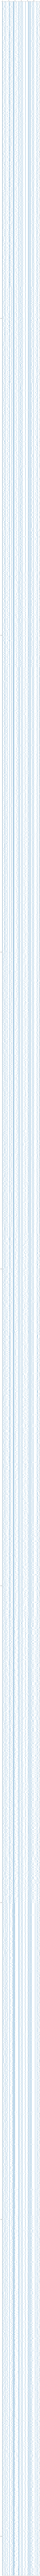

In [401]:
import matplotlib.pyplot as plt
plt.figure(figsize=(200,800))
plt.spy(pd.get_dummies(dataset_from_csv), markersize=3)
plt.show()
